In [25]:
%% Machine Learning Online Class
%  Exercise 5 | Regularized Linear Regression and Bias-Variance
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     linearRegCostFunction.m
%     learningCurve.m
%     validationCurve.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ;
%close all;
clc;
graphics_toolkit ("gnuplot");

Loading and Visualizing Data ...


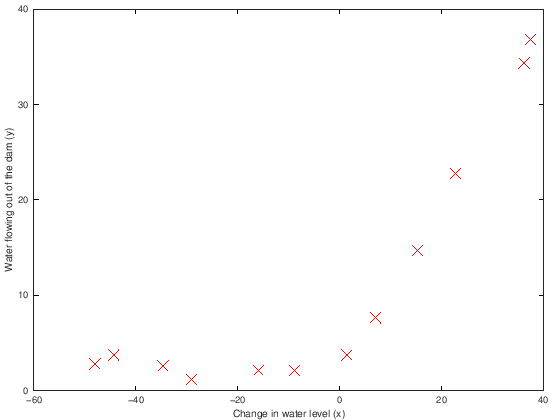

In [27]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
figure(1)
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

In [28]:
%% =========== Part 2: Regularized Linear Regression Cost =============
%  You should now implement the cost function for regularized linear 
##  regression. 
%

theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


In [29]:
%% =========== Part 3: Regularized Linear Regression Gradient =============
%  You should now implement the gradient for regularized linear 
%  regression.
%

theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


Iteration     3 | Cost: 2.237391e+01


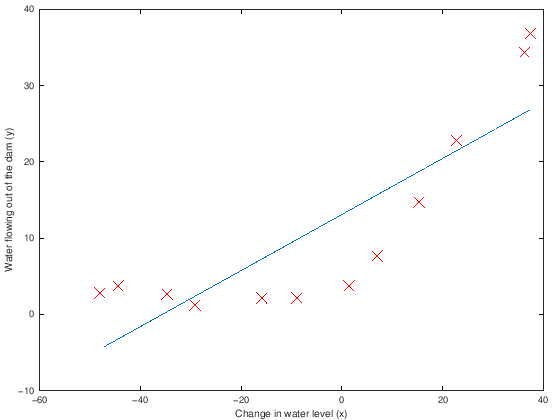

In [30]:
%% =========== Part 4: Train Linear Regression =============
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
figure(1)
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)

In [31]:
warning ("off", "divide-by-zero")
%% =========== Part 5: Learning Curve for Linear Regression =============
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

Iteration     3 | Cost: 0.000000e+00
Iteration     3 | Cost: 1.232595e-30
Iteration     3 | Cost: 3.286595e+00
Iteration    14 | Cost: 2.842678e+00
Iteration    23 | Cost: 1.315405e+01
Iteration    22 | Cost: 1.944396e+01
Iteration    13 | Cost: 2.009852e+01
Iteration   200 | Cost: 1.817286e+01
Iteration     7 | Cost: 2.260941e+01
Iteration    37 | Cost: 2.326146e+01
Iteration    11 | Cost: 2.431725e+01
Iteration     3 | Cost: 2.237391e+01


In [32]:
error_train_lin_reg = error_train ;
error_val_lin_reg = error_val;

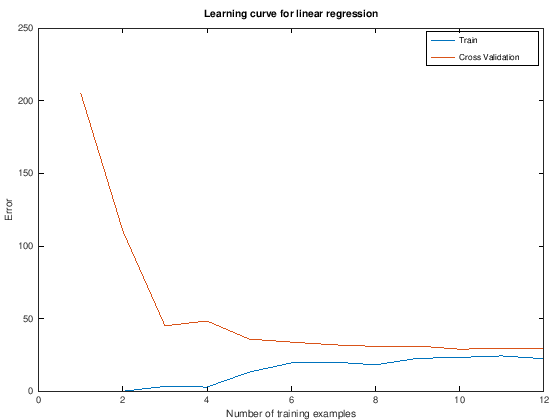

In [34]:
figure(2)
plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression');
legend('Train', 'Cross Validation');
xlabel('Number of training examples');
ylabel('Error');
##axis([0 13 0 150])

In [35]:
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


In [37]:
%% =========== Part 6: Feature Mapping for Polynomial Regression =============
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


Iteration   200 | Cost: 1.774519e-01


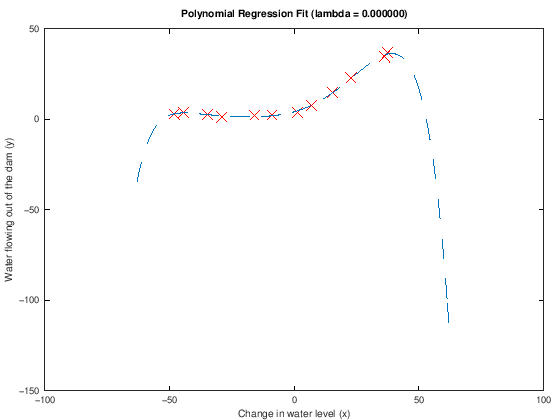

In [38]:
%% =========== Part 7: Learning Curve for Polynomial Regression =============
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 0;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
%hold on
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

In [ ]:
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda)

Iteration     2 | Cost: 0.000000e+00
Iteration    14 | Cost: 0.000000e+00
Iteration    28 | Cost: 6.573841e-32
Iteration     9 | Cost: 1.304086e-29
Iteration   200 | Cost: 1.119109e-10
Iteration   200 | Cost: 3.082891e-05
Iteration   200 | Cost: 3.148071e-02
Iteration   200 | Cost: 6.511896e-02
Iteration   200 | Cost: 1.918221e-01
Iteration   200 | Cost: 1.139489e-01
Iteration   158 | Cost: 1.839930e-01

In [40]:
error_train_poly = error_train ;
error_val_poly = error_val;

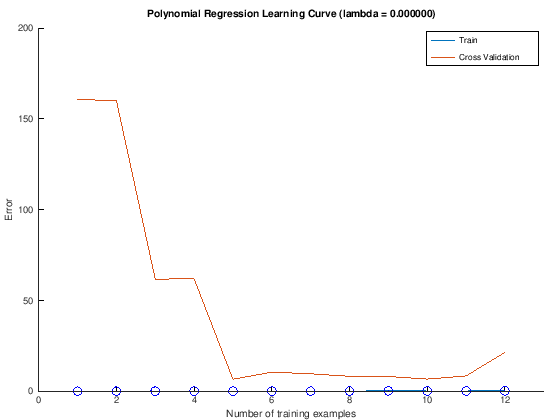

In [74]:
figure(2);
hold on

plot(1:m, error_train);

plot( 1:m, error_val);
title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 200])
legend('Train', 'Cross Validation');
scatter(1:m, error_train,600, 'b')
 % set (gca, "yscale", "log");

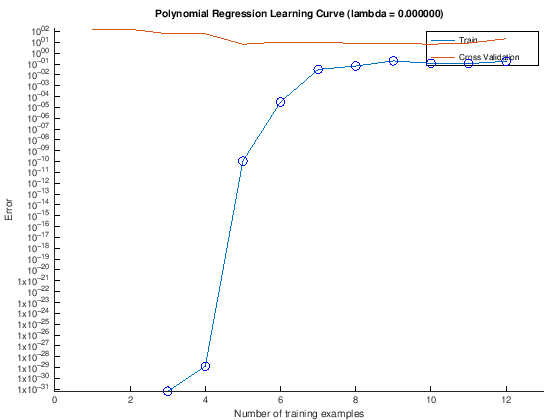

In [78]:
figure(2);
hold on

plot(1:m, error_train);

plot( 1:m, error_val);
title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 200])
legend('Train', 'Cross Validation');
scatter(1:m, error_train,600, 'b')
 set (gca, "yscale", "log");

In [80]:
fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.597568
  	6		0.000031	10.535311
  	7		0.031481	9.596765
  	8		0.065119	8.202909
  	9		0.191822	8.107255
  	10		0.113949	6.660176
  	11		0.107094	8.434388
  	12		0.177452	21.380103


In [ ]:
%% =========== Part 8: Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

Iteration   200 | Cost: 2.025252e-01
Iteration   200 | Cost: 2.502534e-01
Iteration   200 | Cost: 3.850708e-01
Iteration   200 | Cost: 4.628082e-01
Iteration   200 | Cost: 5.696457e-01
Iteration   200 | Cost: 7.171056e-01
Iteration   200 | Cost: 1.198806e+00
Iteration   149 | Cost: 1.578045e+00
Iteration    79 | Cost: 4.914923e+00Iteration    25 | Cost: 4.916528e+00
Iteration    72 | Cost: 6.553615e+00
Iteration    57 | Cost: 8.756942e+00
Iteration    50 | Cost: 1.170355e+01
Iteration    19 | Cost: 1.557101e+01

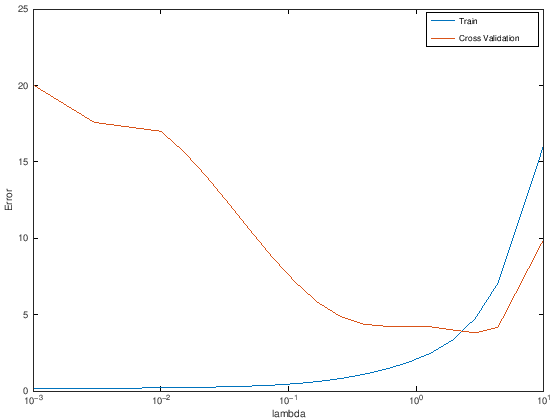

In [85]:
figure(3)
##plot(lambda_vec, error_train, lambda_vec, error_val);
semilogx(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

In [86]:
[min_err, idx] = min(error_val);
 
printf('Minimum validation error is '), disp(min_err), printf(' for lambda = '), disp(lambda_vec(idx))

Minimum validation error is 3.8233
 for lambda = 2.9193


In [89]:
fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
	fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

lambda		Train Error	Validation Error
 0.001000	0.177829	20.030695
 0.003000	0.175303	17.583106
 0.010000	0.222155	17.003845
 0.015000	0.239447	15.692835
 0.022500	0.261550	14.094802
 0.033750	0.291761	12.300663
 0.050625	0.335421	10.465509
 0.075938	0.399405	8.696146
 0.113906	0.493614	7.100449
 0.170859	0.631303	5.792970
 0.256289	0.827206	4.875920
 0.384434	1.093565	4.387923
 0.576650	1.439804	4.248742
 0.864976	1.884485	4.262461
 1.297463	2.483242	4.211375
 1.946195	3.367319	4.005343
 2.919293	4.779113	3.823319
 4.378939	7.078572	4.188655
 10.000000	16.092213	9.945509


In [90]:
lambda = 3;

[theta] = trainLinearReg(X_poly, y, lambda);

Iteration    39 | Cost: 1.586769e+01


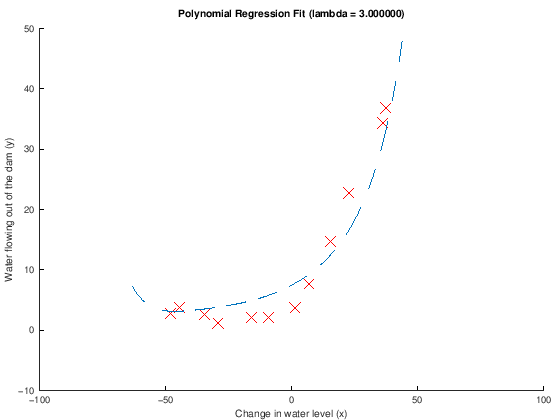

In [91]:
% Plot training data and fit
figure(1);
hold on
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
ylim([-10 50])
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));
hold off

In [93]:
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);

Iteration    35 | Cost: 0.000000e+004
Iteration     4 | Cost: 9.652732e-02
Iteration    23 | Cost: 4.227606e+01
Iteration    28 | Cost: 3.633904e+01
Iteration    45 | Cost: 2.909662e+01
Iteration    24 | Cost: 2.578654e+01
Iteration    16 | Cost: 2.269255e+01
Iteration    28 | Cost: 1.992017e+01
Iteration    42 | Cost: 1.851490e+01
Iteration    53 | Cost: 1.668588e+01
Iteration    52 | Cost: 1.519306e+01
Iteration    39 | Cost: 1.586769e+01


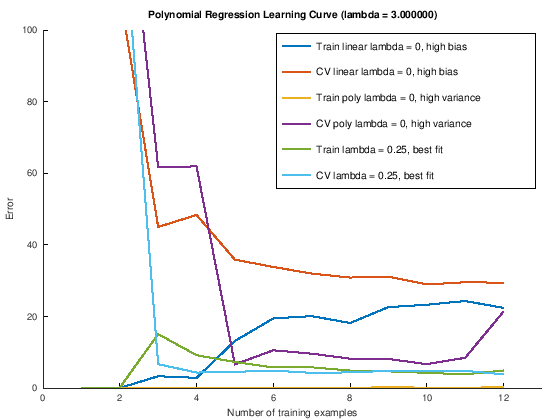

In [101]:
figure(2);
hold on
plot(1:m, error_train_lin_reg,'linewidth',4, 1:m, error_val_lin_reg,'linewidth',4);

plot(1:m, error_train_poly,'linewidth',4, 1:m, error_val_poly,'linewidth',4);

plot(1:m, error_train,'linewidth',4, 1:m, error_val,'linewidth',4);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
%grid()
axis([0 13 0 100])
h=legend('Train linear lambda = 0, high bias', 'CV linear lambda = 0, high bias', 'Train poly lambda = 0, high variance', 'CV poly lambda = 0, high variance', 'Train lambda = 0.25, best fit', 'CV lambda = 0.25, best fit');
set (h, "fontsize", 11);

In [103]:
fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);

fprintf('Cost in test set using lambda = '), disp(lambda), disp(linearRegCostFunction(X_poly_test, ytest, theta, 0));

Polynomial Regression (lambda = 3.000000)

Cost in test set using lambda = 3
3.8599
